In [1]:
#install.packages("vcd")
library(DHARMa)
library(lindia)
library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(modEvA)
library(dplyr)
library(lme4)##random effect

This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':



ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'foreign'


## Download data

In [8]:
#path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/chapter0_final_/Cleaning/Raw&Cleaned'
path_ = 'C:/Users/camil/Desktop'
#jpeg(file.path(path_, 'diagnostic_plot_.jpg'))
df = read.csv(file.path(path_, 'df4DifferenceModelling.csv'), header = TRUE, sep = ";")
#df = read.csv(file.path(path_, 'df4DifferenceModelling_4lowerDF.csv'), header = TRUE, sep = ";")
#df = read.csv(file.path(path_, 'df4DifferenceModelling_mixedHenID.csv'), header = TRUE, sep = ";")
#li_var_cont = c('ID0','ID1','ID2','ID3','ID4','ID5','ID6','ID7')
df$PenID = as.factor(df$PenID)
df$tracking_system = as.factor(df$tracking_system)
df$Trackingsystem_Zone = as.factor(df$Trackingsystem_Zone)
df$HenID = as.factor(df$HenID)
df$level = as.factor(df$level)
df$level_continuous = as.integer(df$level_continuous)
df$absolute_difference_log_1 = log(df$absolute_difference+1) #add one then take the log
df$absolute_difference_log_0 = log(df$absolute_difference+0.1) #add one then take the log
df$absolute_difference_sqrt = sqrt(df$absolute_difference)
#print(as.data.frame(table(df$maxsevGap0_divided_maxsev_round)))
print(dim(df))
summary(df)

[1] 40735    14


 absolute_difference     PenID                  tracking_system 
 Min.   : 0.000      Pen 8  :5200   TrackingSystem 10-12:15035  
 1st Qu.: 0.000      Pen 9  :5200   TrackingSystem 3-5  :15300  
 Median : 1.000      Pen 11 :5100   TrackingSystem 8-9  :10400  
 Mean   : 3.145      Pen 3  :5100                               
 3rd Qu.: 4.000      Pen 4  :5100                               
 Max.   :70.000      Pen 5  :5100                               
                     (Other):9935                               
       Trackingsystem_Zone     HenID              level       level_continuous
 nbr_stays_1_Zone:8147     hen_1  :  260   2020-11-26:  795   Min.   : 0.00   
 nbr_stays_2_Zone:8147     hen_105:  260   2020-11-27:  795   1st Qu.:12.00   
 nbr_stays_3_Zone:8147     hen_106:  260   2020-11-28:  795   Median :27.00   
 nbr_stays_4_Zone:8147     hen_113:  260   2020-11-29:  795   Mean   :26.23   
 nbr_stays_5_Zone:8147     hen_116:  260   2020-11-30:  795   3rd Qu.:40.00   
      

In [10]:
df_z1 = df[df$Trackingsystem_Zone == 'nbr_stays_1_Zone', ] 

In [11]:
df_z2 = df[df$Trackingsystem_Zone == 'nbr_stays_2_Zone', ] 

In [12]:
df_z3 = df[df$Trackingsystem_Zone == 'nbr_stays_3_Zone', ] 

In [13]:
df_z4 = df[df$Trackingsystem_Zone == 'nbr_stays_4_Zone', ] 

In [14]:
df_z5 = df[df$Trackingsystem_Zone == 'nbr_stays_5_Zone', ] 

# Models

model_final = glm(absolute_difference ~ PenID*Trackingsystem_Zone+HenID, family='poisson', data=df) #=quasipoisson(link = "log")
summary(model_final)  #absolute_difference_log_0
plot(model_final)
Dsquared(model_final)
bin.resid.df =  simulateResiduals(model_final, 2000)
plotSimulatedResiduals(bin.resid.df)
plot(bin.resid.df)

## with date as random effect

#environemental factors
#date as categories
#date as continuous variable
#total time of ay
model_re = glmer(absolute_difference ~ PenID*Trackingsystem_Zone+HenID + (1|level), data = df, family = binomial) 

print(summary(model_re))
af = anova(model_re)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model_re)

### Anova per zone


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5827 -0.4496 -0.2179  0.1728  4.1770 

Coefficients: (7 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.321581   0.117637 -11.234  < 2e-16 ***
PenIDPen 11   0.367977   0.165843   2.219 0.026518 *  
PenIDPen 12  -0.648936   0.165843  -3.913 9.17e-05 ***
PenIDPen 3   -0.853027   0.165843  -5.144 2.74e-07 ***
PenIDPen 4   -0.364568   0.165843  -2.198 0.027950 *  
PenIDPen 5   -0.661285   0.168567  -3.923 8.80e-05 ***
PenIDPen 8    1.802992   0.165333  10.905  < 2e-16 ***
PenIDPen 9    2.989588   0.166363  17.970  < 2e-16 ***
HenIDhen_10  -1.199113   0.165320  -7.253 4.34e-13 ***
HenIDhen_101  0.232425   0.170742   1.361 0.173458    
HenIDhen_102  0.321628   0.165320   1.945 0.051742 .  
HenIDhen_105 -0.952731   0.165333  -5.762 8.51e-09 ***
HenIDhen_106 -1.861228   0.165333 -11.257  < 2e-16 ***
Hen

             Df    Sum Sq     Mean Sq    F value Pr(>F)   PctExp
PenID         7 10596.198 1513.742582 1384.64738      0 39.41338
HenID       134  4092.463   30.540769   27.93619      0 15.22223
Residuals 11156 12196.110    1.093233         NA     NA 45.36438


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.012341"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00015926"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0722e-015"

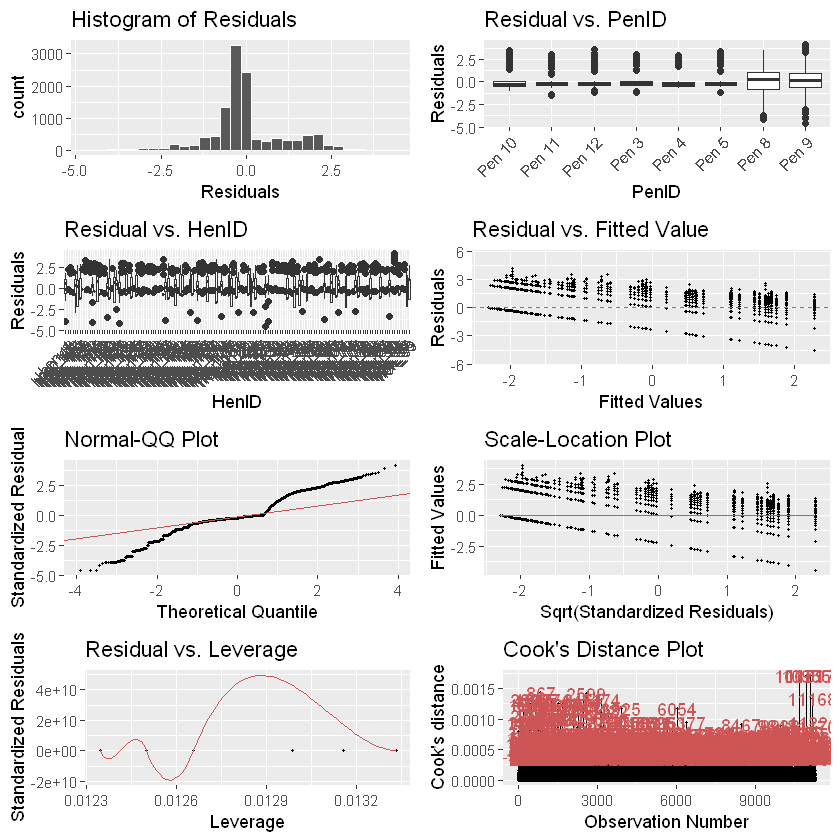

In [75]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z1)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6445 -0.6694  0.1553  0.8135  4.2342 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.59863    0.13651   4.385 1.17e-05 ***
PenIDPen 11  -0.54378    0.19246  -2.825 0.004729 ** 
PenIDPen 12  -0.34260    0.19246  -1.780 0.075079 .  
PenIDPen 3    0.63861    0.19246   3.318 0.000909 ***
PenIDPen 4    0.84794    0.19246   4.406 1.06e-05 ***
PenIDPen 5   -2.06224    0.19562 -10.542  < 2e-16 ***
PenIDPen 8    0.73469    0.19186   3.829 0.000129 ***
PenIDPen 9    1.10713    0.19306   5.735 1.00e-08 ***
HenIDhen_10  -0.35830    0.19185  -1.868 0.061844 .  
HenIDhen_101  0.22113    0.19814   1.116 0.264446    
HenIDhen_102 -1.73508    0.19185  -9.044  < 2e-16 ***
HenIDhen_105 -0.13961    0.19186  -0.728 0.466847    
HenIDhen_106 -0.29641    0.19186  -1.545 0.122401    
HenIDhen_107  0.8

             Df    Sum Sq     Mean Sq    F value Pr(>F)   PctExp
PenID         7 10677.352 1525.336009 1036.06256      0 29.62943
HenID       134  8934.603   66.676144   45.28881      0 24.79334
Residuals 11156 16424.345    1.472243         NA     NA 45.57722


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.012341"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00015926"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  9.7491e-016"

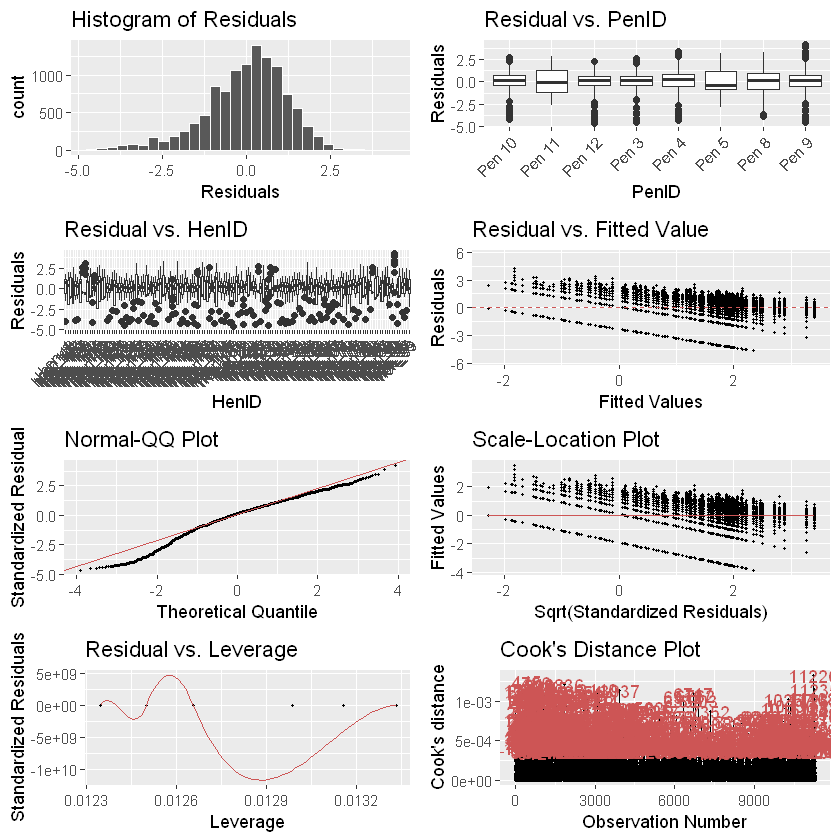

In [76]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z2)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6809 -0.6664  0.1168  0.7908  4.0031 

Coefficients: (7 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.40321    0.13999   2.880 0.003982 ** 
PenIDPen 11  -0.74538    0.19736  -3.777 0.000160 ***
PenIDPen 12  -0.32414    0.19736  -1.642 0.100532    
PenIDPen 3    0.98532    0.19736   4.993 6.05e-07 ***
PenIDPen 4    1.32315    0.19736   6.704 2.12e-11 ***
PenIDPen 5   -1.27307    0.20060  -6.346 2.29e-10 ***
PenIDPen 8    1.35785    0.19675   6.901 5.43e-12 ***
PenIDPen 9    0.43093    0.19798   2.177 0.029527 *  
HenIDhen_10  -0.33088    0.19674  -1.682 0.092631 .  
HenIDhen_101  0.39078    0.20319   1.923 0.054474 .  
HenIDhen_102 -1.90497    0.19674  -9.683  < 2e-16 ***
HenIDhen_105  0.46561    0.19675   2.366 0.017975 *  
HenIDhen_106  0.88020    0.19675   4.474 7.77e-06 ***
HenIDhen_107  2.4

             Df    Sum Sq     Mean Sq    F value Pr(>F)   PctExp
PenID         7 10840.501 1548.642939 1000.28096      0 28.69452
HenID       134  9666.679   72.139397   46.59542      0 25.58745
Residuals 11156 17271.808    1.548208         NA     NA 45.71803


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.012341"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00015926"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0481e-015"

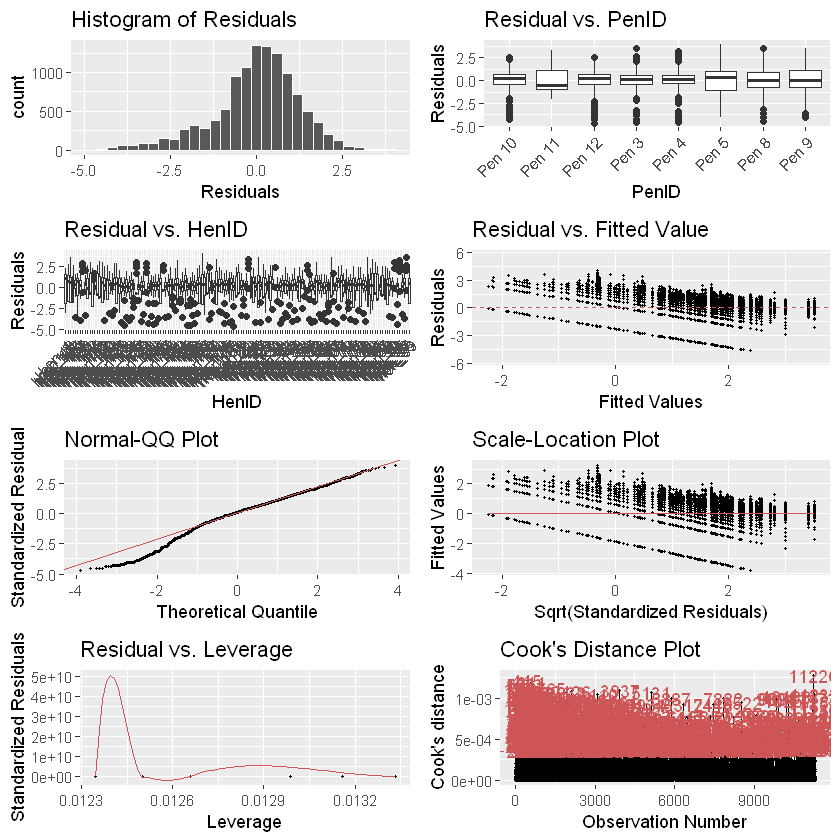

In [77]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z3)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z4)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6518 -0.4026 -0.0959  0.2296  4.1847 

Coefficients: (7 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.303e+00  1.217e-01 -18.918  < 2e-16 ***
PenIDPen 11   2.997e-02  1.716e-01   0.175 0.861335    
PenIDPen 12   5.995e-02  1.716e-01   0.349 0.726826    
PenIDPen 3    3.261e-01  1.716e-01   1.901 0.057365 .  
PenIDPen 4    2.073e+00  1.716e-01  12.080  < 2e-16 ***
PenIDPen 5    6.394e-02  1.744e-01   0.367 0.713904    
PenIDPen 8    3.440e+00  1.711e-01  20.106  < 2e-16 ***
PenIDPen 9    2.904e+00  1.721e-01  16.868  < 2e-16 ***
HenIDhen_10   8.992e-02  1.711e-01   0.526 0.599111    
HenIDhen_101  8.440e-02  1.767e-01   0.478 0.632853    
HenIDhen_102 -2.962e-01  1.711e-01  -1.731 0.083392 .  
HenIDhen_105  2.575e-01  1.711e-01   1.506 0.132214    
HenIDhen_106  8.004e-01  1.711e-01   4.679 2.

             Df    Sum Sq     Mean Sq   F value Pr(>F)   PctExp
PenID         7  7824.340 1117.762795 955.06482      0 29.09786
HenID       134  6008.951   44.842919  38.31573      0 22.34663
Residuals 11156 13056.456    1.170353        NA     NA 48.55552


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.012341"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00015926"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0481e-015"

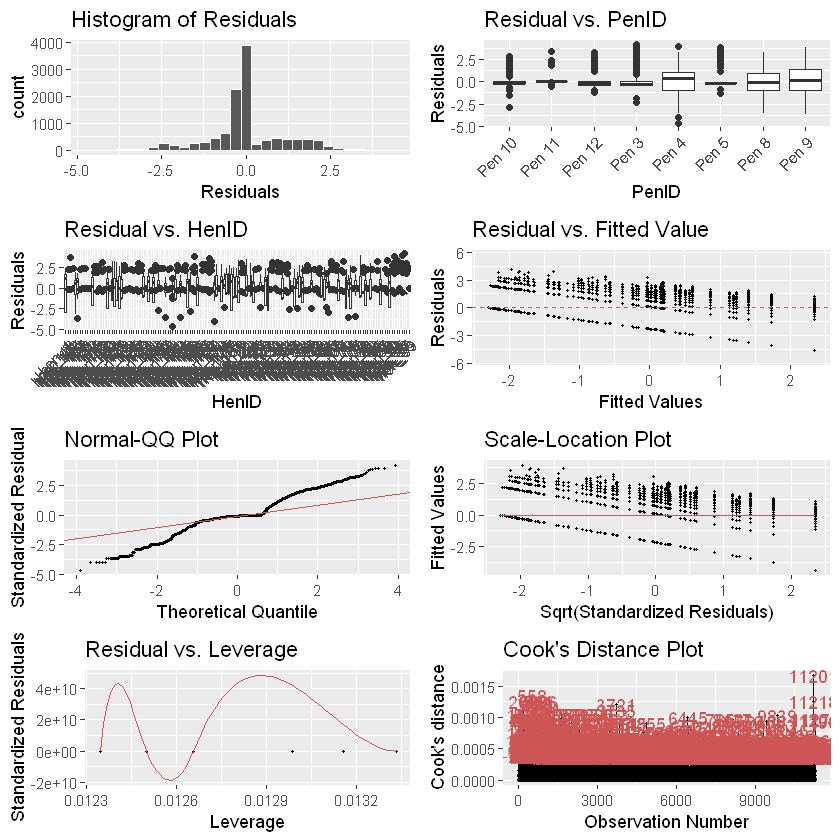

In [78]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z4)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + HenID, data = df_z5)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7061 -0.6626 -0.2421  0.7458  4.6298 

Coefficients: (7 not defined because of singularities)
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.869e+00  1.388e-01 -13.467  < 2e-16 ***
PenIDPen 11  -3.007e-01  1.957e-01  -1.537 0.124400    
PenIDPen 12  -8.277e-02  1.957e-01  -0.423 0.672288    
PenIDPen 3    2.135e-01  1.957e-01   1.091 0.275193    
PenIDPen 4   -3.136e-01  1.957e-01  -1.603 0.108991    
PenIDPen 5    1.557e-01  1.989e-01   0.783 0.433662    
PenIDPen 8    2.796e-01  1.951e-01   1.433 0.151798    
PenIDPen 9    3.156e-01  1.963e-01   1.608 0.107876    
HenIDhen_10   1.131e+00  1.950e-01   5.797 6.92e-09 ***
HenIDhen_101  5.435e-01  2.014e-01   2.698 0.006983 ** 
HenIDhen_102 -4.713e-01  1.950e-01  -2.416 0.015702 *  
HenIDhen_105  1.552e+00  1.951e-01   7.959 1.90e-15 ***
HenIDhen_106  1.119e+00  1.951e-01   5.734 1.

             Df    Sum Sq    Mean Sq   F value Pr(>F)   PctExp
PenID         7  2818.998 402.713996 264.64983      0 11.28716
HenID       134  5180.344  38.659283  25.40556      0 20.74189
Residuals 11156 16975.931   1.521686        NA     NA 67.97095


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 0.012341"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.00015926"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  1.0722e-015"

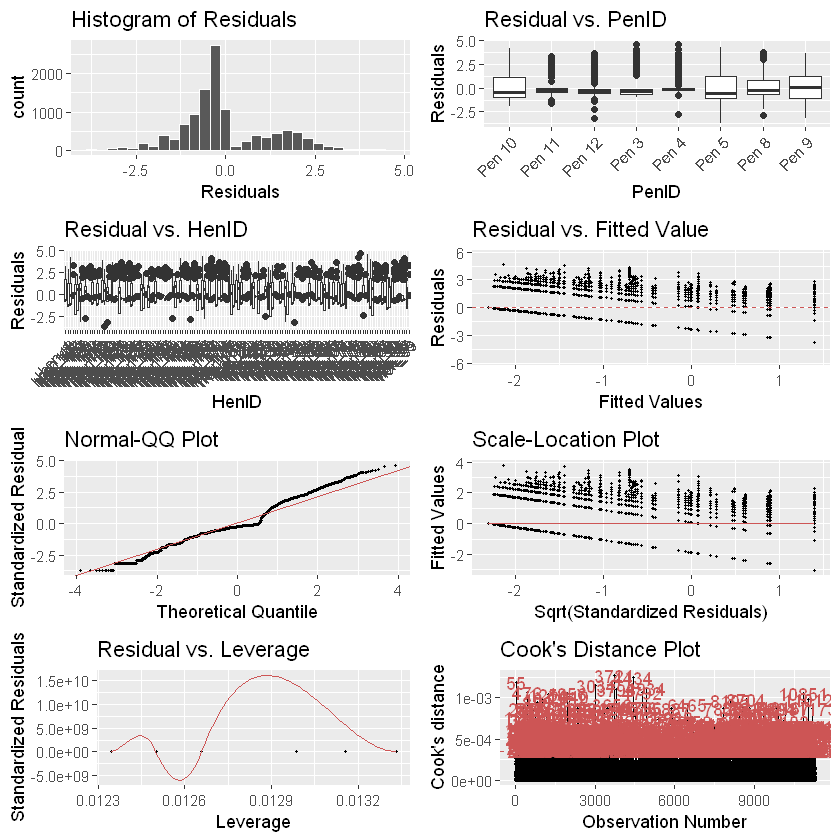

In [74]:
model = lm(absolute_difference_log_0~PenID+HenID, data=df_z5)
print(summary(model))
af = anova(model)
afss = af$"Sum Sq"
print(cbind(af,PctExp=afss/sum(afss)*100))
lindia::gg_diagnose(model)

In [3]:
#null model
null_model = lm(absolute_difference_log_0~1, data=df)
print(summary(null_model))


Call:
lm(formula = absolute_difference_log_0 ~ 1, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-1.774 -1.774 -1.774  1.660  5.062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.52850    0.00809  -65.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.923 on 56489 degrees of freedom



In [4]:
model = lm(absolute_difference_log_0~HenID, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ HenID, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8827 -1.5657 -0.3587  1.5684  4.9680 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.65108    0.08847   7.359 1.88e-13 ***
HenIDhen_10  -1.92127    0.12473 -15.404  < 2e-16 ***
HenIDhen_101 -2.01030    0.12678 -15.857  < 2e-16 ***
HenIDhen_102 -2.10442    0.12473 -16.872  < 2e-16 ***
HenIDhen_105  0.23666    0.12434   1.903 0.057009 .  
HenIDhen_106  0.12830    0.12434   1.032 0.302154    
HenIDhen_107 -0.94815    0.12678  -7.479 7.60e-14 ***
HenIDhen_108 -2.63484    0.12473 -21.125  < 2e-16 ***
HenIDhen_109 -1.53663    0.12678 -12.121  < 2e-16 ***
HenIDhen_111 -2.29211    0.12473 -18.377  < 2e-16 ***
HenIDhen_112 -2.42460    0.12473 -19.439  < 2e-16 ***
HenIDhen_113 -0.22572    0.12434  -1.815 0.069492 .  
HenIDhen_115 -0.66912    0.12473  -5.365 8.14e-08 ***
HenIDhen_116 -1.68946    0.12434 -13.587  < 2e-16 ***
HenIDhen_118 -2

In [5]:
model = lm(absolute_difference_log_0~PenID, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ PenID, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4358 -1.8163 -0.7143  1.6836  5.2131 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.42949    0.02188 -19.632  < 2e-16 ***
PenIDPen 11 -1.15876    0.03093 -37.466  < 2e-16 ***
PenIDPen 12 -0.05684    0.03140  -1.810   0.0703 .  
PenIDPen 3  -0.09213    0.03093  -2.979   0.0029 ** 
PenIDPen 4   0.29451    0.03093   9.522  < 2e-16 ***
PenIDPen 5  -0.57748    0.03191 -18.096  < 2e-16 ***
PenIDPen 8   0.17487    0.03084   5.671 1.43e-08 ***
PenIDPen 9   0.56274    0.03086  18.233  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.855 on 56482 degrees of freedom
Multiple R-squared:  0.06928,	Adjusted R-squared:  0.06917 
F-statistic: 600.7 on 7 and 56482 DF,  p-value: < 2.2e-16



In [6]:
model = lm(absolute_difference_log_0~tracking_system, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ tracking_system, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-2.242 -1.766 -1.461  1.668  5.134 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -0.84179    0.01305  -64.52   <2e-16 ***
tracking_systemTrackingSystem 3-5  0.30524    0.01854   16.46   <2e-16 ***
tracking_systemTrackingSystem 8-9  0.78077    0.02045   38.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.898 on 56487 degrees of freedom
Multiple R-squared:  0.02518,	Adjusted R-squared:  0.02514 
F-statistic: 729.4 on 2 and 56487 DF,  p-value: < 2.2e-16



In [7]:
model = lm(absolute_difference_log_0~Trackingsystem_Zone, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ Trackingsystem_Zone, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0127 -0.9592 -0.9492  1.4286  5.5644 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.343376   0.015462 -86.884   <2e-16 ***
Trackingsystem_Zonenbr_stays_2_Zone  2.053521   0.021866  93.913   <2e-16 ***
Trackingsystem_Zonenbr_stays_3_Zone  2.020815   0.021866  92.417   <2e-16 ***
Trackingsystem_Zonenbr_stays_4_Zone  0.010039   0.021866   0.459    0.646    
Trackingsystem_Zonenbr_stays_5_Zone -0.009984   0.021866  -0.457    0.648    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.643 on 56485 degrees of freedom
Multiple R-squared:  0.2695,	Adjusted R-squared:  0.2694 
F-statistic:  5208 on 4 and 56485 DF,  p-value: < 2.2e-16



In [8]:
model = lm(absolute_difference_log_0~Trackingsystem_Zone*PenID, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ Trackingsystem_Zone * 
    PenID, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1049 -0.5583 -0.3287  1.0066  5.1965 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                     -1.90717    0.03678 -51.854
Trackingsystem_Zonenbr_stays_2_Zone              3.38152    0.05201  65.012
Trackingsystem_Zonenbr_stays_3_Zone              3.41210    0.05201  65.600
Trackingsystem_Zonenbr_stays_4_Zone              0.06485    0.05201   1.247
Trackingsystem_Zonenbr_stays_5_Zone              0.52994    0.05201  10.188
PenIDPen 11                                      0.06098    0.05200   1.173
PenIDPen 12                                      0.10964    0.05279   2.077
PenIDPen 3                                      -0.10249    0.05200  -1.971
PenIDPen 4                                      -0.06668    0.05200  -1.282
PenIDPen 5                            

In [9]:
model = lm(absolute_difference_log_0~Trackingsystem_Zone+PenID, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ Trackingsystem_Zone + 
    PenID, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6745 -1.0582 -0.1037  1.2120  6.0380 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.244364   0.022654 -54.929  < 2e-16 ***
Trackingsystem_Zonenbr_stays_2_Zone  2.053521   0.020805  98.704  < 2e-16 ***
Trackingsystem_Zonenbr_stays_3_Zone  2.020815   0.020805  97.132  < 2e-16 ***
Trackingsystem_Zonenbr_stays_4_Zone  0.010039   0.020805   0.483  0.62942    
Trackingsystem_Zonenbr_stays_5_Zone -0.009984   0.020805  -0.480  0.63133    
PenIDPen 11                         -1.158755   0.026071 -44.447  < 2e-16 ***
PenIDPen 12                         -0.056835   0.026471  -2.147  0.03179 *  
PenIDPen 3                          -0.092125   0.026071  -3.534  0.00041 ***
PenIDPen 4                           0.294507   0.026071  11.297  < 2e-16 ***
PenIDPen 5        

In [10]:
model = lm(absolute_difference_log_0~Trackingsystem_Zone+PenID+PenID*Trackingsystem_Zone, data=df)
print(summary(model))


Call:
lm(formula = absolute_difference_log_0 ~ Trackingsystem_Zone + 
    PenID + PenID * Trackingsystem_Zone, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1049 -0.5583 -0.3287  1.0066  5.1965 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                     -1.90717    0.03678 -51.854
Trackingsystem_Zonenbr_stays_2_Zone              3.38152    0.05201  65.012
Trackingsystem_Zonenbr_stays_3_Zone              3.41210    0.05201  65.600
Trackingsystem_Zonenbr_stays_4_Zone              0.06485    0.05201   1.247
Trackingsystem_Zonenbr_stays_5_Zone              0.52994    0.05201  10.188
PenIDPen 11                                      0.06098    0.05200   1.173
PenIDPen 12                                      0.10964    0.05279   2.077
PenIDPen 3                                      -0.10249    0.05200  -1.971
PenIDPen 4                                      -0.06668    0.05200  -1.282
PenIDPen


Call:
lm(formula = absolute_difference_log_0 ~ PenID * Trackingsystem_Zone + 
    HenID + level_continuous + temperature_C + humidity_avgpercent, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9432 -0.7418 -0.0588  0.7696  5.5826 

Coefficients: (7 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                     -1.5882527  0.1240154 -12.807
PenIDPen 11                                      0.6798328  0.1192184   5.702
PenIDPen 12                                     -0.6225647  0.1194771  -5.211
PenIDPen 3                                      -0.0373888  0.1192187  -0.314
PenIDPen 4                                      -0.1271450  0.1192187  -1.066
PenIDPen 5                                      -0.6682925  0.1192187  -5.606
PenIDPen 8                                       3.1175662  0.1186494  26.275
PenIDPen 9                                       3.8602840  0.1

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
PenID,7,12570.197132,1795.742447,1200.138641,0.000000e+00,8.179443778
Trackingsystem_Zone,4,42540.377337,10635.094334,7107.693914,0.000000e+00,27.681079385
HenID,149,17171.912495,115.247735,77.022883,0.000000e+00,11.173786006
level_continuous,1,2.633032,2.633032,1.759720,1.846671e-01,0.001713317
temperature_C,1,10.910743,10.910743,7.291917,6.929465e-03,0.007099635
humidity_avgpercent,1,23.752843,23.752843,15.874606,6.780046e-05,0.015456006
PenID:Trackingsystem_Zone,28,21445.051233,765.894687,511.866170,0.000000e+00,13.954322993
Residuals,40043,59915.506711,1.496279,NA,NA,38.987098881


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


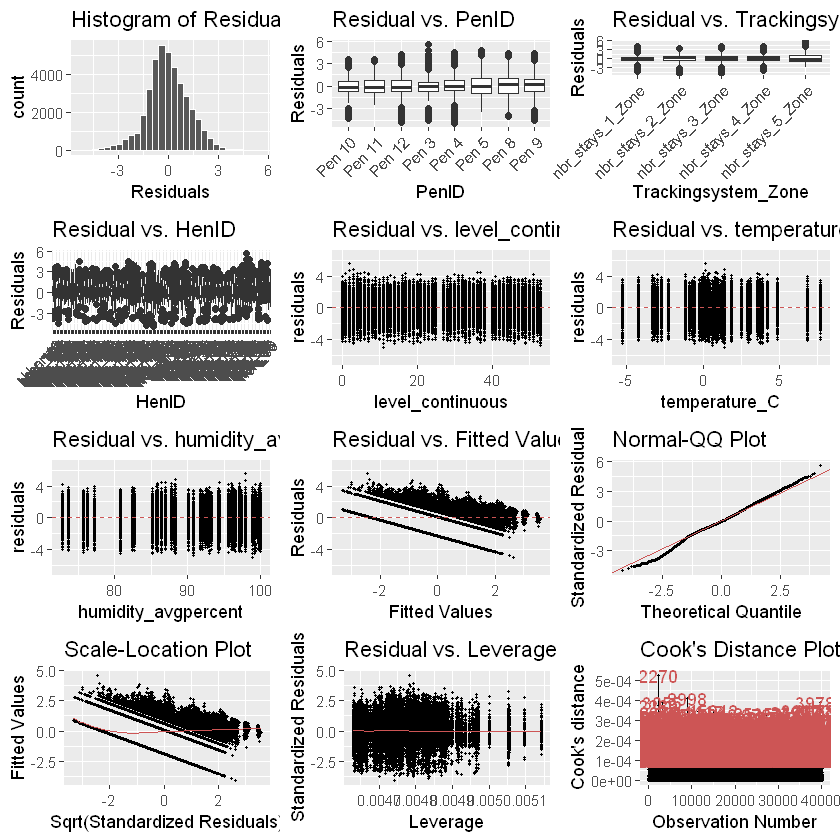

In [18]:
#caca
model = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID+level_continuous+temperature_C+humidity_avgpercent,data=df)
print(summary(model))
an = anova(model)
afss =an$"Sum Sq"
cbind(an,PctExp=afss/sum(afss)*100)
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ tracking_system * Trackingsystem_Zone + 
    HenID + level_continuous, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8046 -0.8991  0.0107  0.8879  6.0511 

Coefficients: (2 not defined because of singularities)
                                                                        Estimate
(Intercept)                                                           -2.0726682
tracking_systemTrackingSystem 3-5                                      0.1455965
tracking_systemTrackingSystem 8-9                                      4.0060136
Trackingsystem_Zonenbr_stays_2_Zone                                    2.7444154
Trackingsystem_Zonenbr_stays_3_Zone                                    2.5466700
Trackingsystem_Zonenbr_stays_4_Zone                                   -0.0317364
Trackingsystem_Zonenbr_stays_5_Zone                                    0.5166384
HenIDhen_10                                                            0

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
tracking_system,2,4499.233882,2249.616941,1259.272563,0.0000000,2.927657394
Trackingsystem_Zone,4,42540.377337,10635.094334,5953.227972,0.0000000,27.681079385
HenID,154,25242.875746,163.914778,91.754902,0.0000000,16.425572390
level_continuous,1,2.633032,2.633032,1.473897,0.2247389,0.001713317
tracking_system:Trackingsystem_Zone,8,9821.437275,1227.679659,687.220692,0.0000000,6.390822129
Residuals,40065,71573.784255,1.786442,NA,NA,46.573155385


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


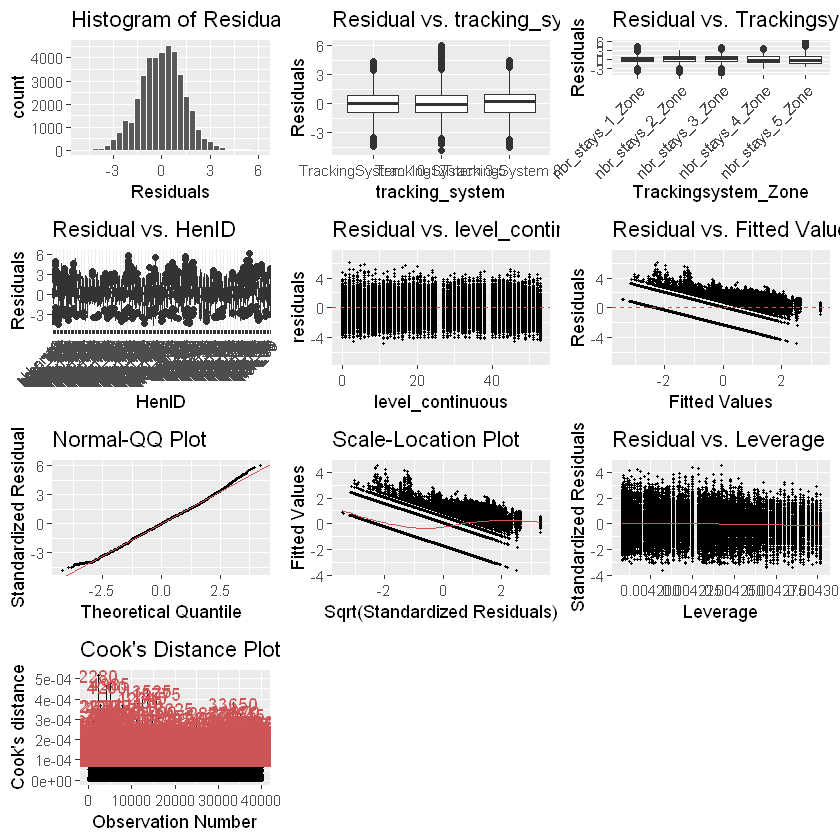

In [13]:
model = lm(absolute_difference_log_0~tracking_system*Trackingsystem_Zone+HenID+level_continuous, data=df)
print(summary(model))
an = anova(model)
afss =an$"Sum Sq"
cbind(an,PctExp=afss/sum(afss)*100)
lindia::gg_diagnose(model)


Call:
lm(formula = absolute_difference_log_0 ~ PenID + Trackingsystem_Zone + 
    HenID + level_continuous, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-5.179 -1.059 -0.041  1.039  6.015 

Coefficients: (7 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         -1.1523877  0.0911224 -12.647  < 2e-16 ***
PenIDPen 11                         -0.6330671  0.1262172  -5.016 5.31e-07 ***
PenIDPen 12                         -0.7203131  0.1262172  -5.707 1.16e-08 ***
PenIDPen 3                          -0.1833159  0.1262174  -1.452 0.146403    
PenIDPen 4                           0.1981502  0.1262174   1.570 0.116444    
PenIDPen 5                          -1.4131185  0.1262174 -11.196  < 2e-16 ***
PenIDPen 8                           1.0602363  0.1256090   8.441  < 2e-16 ***
PenIDPen 9                           1.8143316  0.1256090  14.444  < 2e-16 ***
Trackingsystem_Zonenbr_stays_

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
PenID,7,12570.197132,1795.742447,884.09105,0.0000000,8.179443778
Trackingsystem_Zone,4,42540.377337,10635.094334,5235.93557,0.0000000,27.681079385
HenID,149,17171.912495,115.247735,56.73948,0.0000000,11.173786006
level_continuous,1,2.633032,2.633032,1.29631,0.2548951,0.001713317
Residuals,40073,81395.221530,2.031174,NA,NA,52.963977514


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


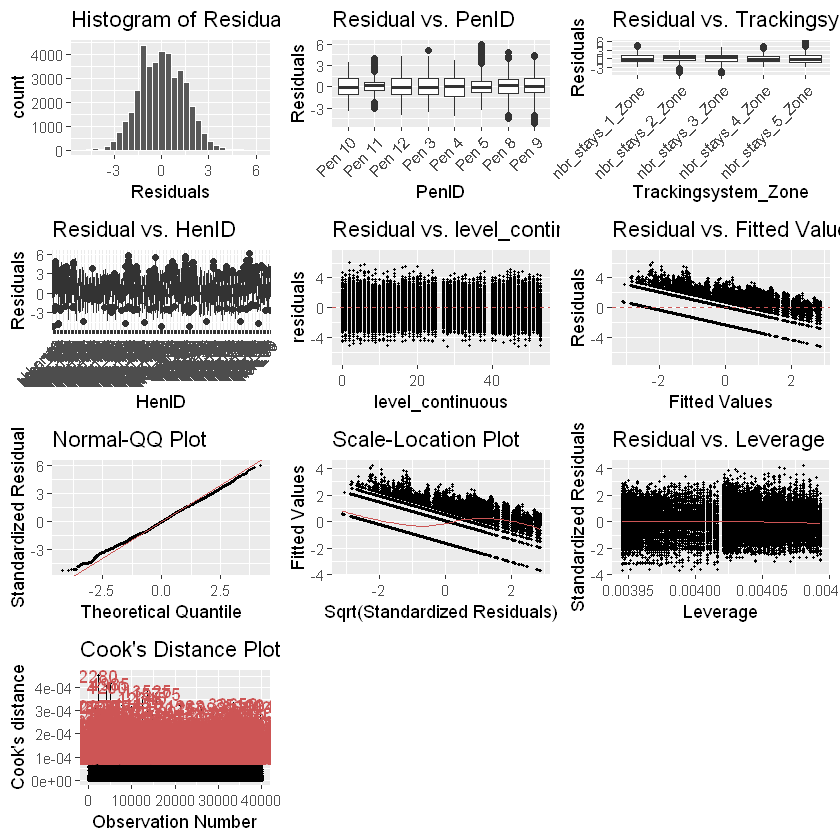

In [12]:
model = lm(absolute_difference_log_0~PenID+Trackingsystem_Zone+HenID+level_continuous, data=df)
print(summary(model))
an = anova(model)
afss =an$"Sum Sq"
cbind(an,PctExp=afss/sum(afss)*100)
lindia::gg_diagnose(model)

## Is a predictor significantly helping the model?

In [12]:
model1 = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone, data=df)
model2 = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
anova(model1,model2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
56450,109807.69,NA,NA,NA,NA
56316,89657.61,134,20150.08,94.45318,0


## Post-hoc analysis - differences between groups 

In [13]:
#Often called post-hoc comparisons or means comparisons, multiple comparisons is the analysis after ANOVA that helps us 
#quantify the differences between groups in order to determine which groups significantly differ from each other. 
aov.model = aov(absolute_difference_log_0 ~ PenID, data=df)
TukeyHSD(aov.model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = absolute_difference_log_0 ~ PenID, data = df)

$PenID
                     diff         lwr          upr     p adj
Pen 11-Pen 10 -1.15875509 -1.25249526 -1.065014922 0.0000000
Pen 12-Pen 10 -0.05683535 -0.15201518  0.038344482 0.6133297
Pen 3-Pen 10  -0.09212534 -0.18586551  0.001614831 0.0581617
Pen 4-Pen 10   0.29450684  0.20076668  0.388247012 0.0000000
Pen 5-Pen 10  -0.57747634 -0.67419970 -0.480752974 0.0000000
Pen 8-Pen 10   0.17487239  0.08140587  0.268338913 0.0000004
Pen 9-Pen 10   0.56273859  0.46919217  0.656285018 0.0000000
Pen 12-Pen 11  1.10191974  1.00677199  1.197067489 0.0000000
Pen 3-Pen 11   1.06662975  0.97292216  1.160337344 0.0000000
Pen 4-Pen 11   1.45326193  1.35955434  1.546969525 0.0000000
Pen 5-Pen 11   0.58127875  0.48458696  0.677970545 0.0000000
Pen 8-Pen 11   1.33362748  1.24019363  1.427061332 0.0000000
Pen 9-Pen 11   1.72149368  1.62797990  1.815007464 0.00000

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = absolute_difference_log_0 ~ tracking_system, data = df)

$tracking_system
                                             diff       lwr       upr p adj
TrackingSystem 3-5-TrackingSystem 10-12 0.3052350 0.2617836 0.3486864     0
TrackingSystem 8-9-TrackingSystem 10-12 0.7807717 0.7328532 0.8286901     0
TrackingSystem 8-9-TrackingSystem 3-5   0.4755366 0.4274330 0.5236403     0


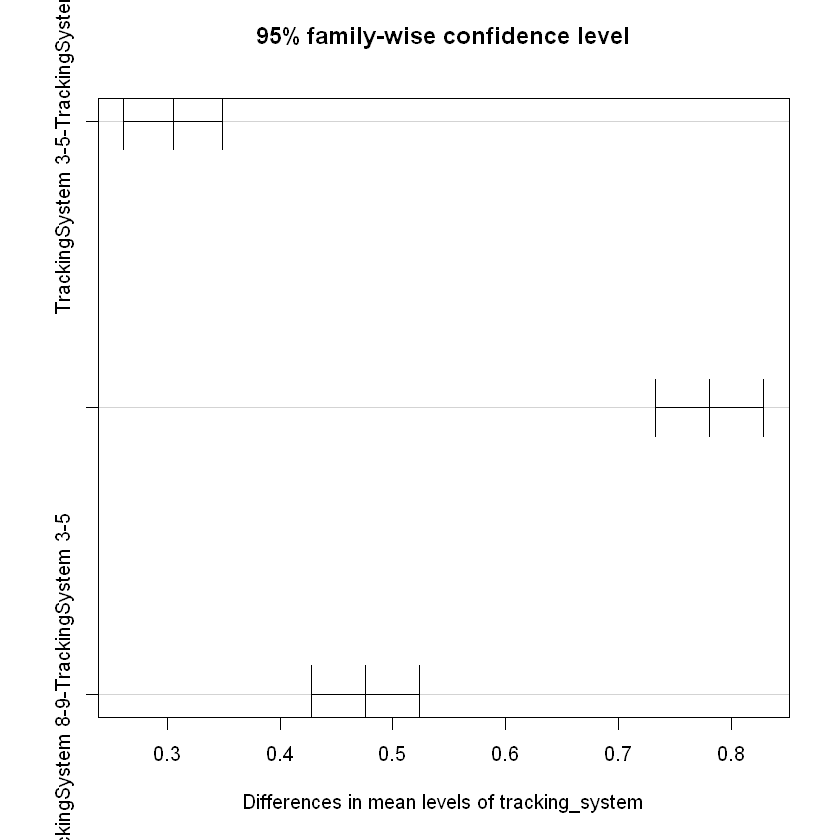

In [14]:
aov.model = aov(absolute_difference_log_0 ~ tracking_system, data=df)
TukeyHSD(aov.model)
plot(TukeyHSD(aov.model))

In [ ]:
mod1 = lm(absolute_difference~group*moderator)
mod2 = aov(absolute_difference~group*moderator)

## Final model

In [22]:
#same as:
#model = lm(absolute_difference_log_1~PenID+Trackingsystem_Zone+PenID*Trackingsystem_Zone+HenID, data=df) 
model_final = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
print(summary(model_final))
af = anova(model_final)
afss <- af$"Sum Sq"
cbind(af,PctExp=afss/sum(afss)*100)


Call:
lm(formula = absolute_difference_log_0 ~ PenID * Trackingsystem_Zone + 
    HenID, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4247 -0.7467 -0.1162  0.8363  5.6447 

Coefficients: (7 not defined because of singularities)
                                                Estimate Std. Error t value
(Intercept)                                     -2.37596    0.07012 -33.886
PenIDPen 11                                      0.98136    0.09890   9.923
PenIDPen 12                                     -0.10123    0.09917  -1.021
PenIDPen 3                                       0.25175    0.09890   2.546
PenIDPen 4                                       0.35197    0.09890   3.559
PenIDPen 5                                      -0.18843    0.10080  -1.869
PenIDPen 8                                       3.35373    0.09860  34.015
PenIDPen 9                                       3.37503    0.09912  34.052
Trackingsystem_Zonenbr_stays_2_Zone              3.38152    0.047

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
PenID,7,14469.00,2066.999570,1298.32978,0,6.928364
Trackingsystem_Zone,4,56272.05,14068.012017,8836.44058,0,26.945423
HenID,134,20150.08,150.373720,94.45318,0,9.648705
PenID:Trackingsystem_Zone,28,28288.39,1010.299688,634.59238,0,13.545672
Residuals,56316,89657.61,1.592045,NA,NA,42.931836


In [27]:
#same as:
#model = lm(absolute_difference_log_1~HenID+PenID+Trackingsystem_Zone+PenID*Trackingsystem_Zone, data=df)
model = lm(absolute_difference_log_0~HenID+PenID*Trackingsystem_Zone, data=df)
af = anova(model)
afss <- af$"Sum Sq"
cbind(af,PctExp=afss/sum(afss)*100)

,Df,Sum Sq,Mean Sq,F value,Pr(>F),PctExp
HenID,141,34619.08,245.525357,154.2201,0,16.57707
Trackingsystem_Zone,4,56272.05,14068.012017,8836.4406,0,26.94542
PenID:Trackingsystem_Zone,28,28288.39,1010.299688,634.5924,0,13.54567
Residuals,56316,89657.61,1.592045,NA,NA,42.93184


## Diagnostic plot

In [ ]:
#one simple plot at a time
#plot(model_final, which = 3)

In [4]:
lindia::gg_diagnose(model_final)

Warning message in if (type != "lm") {:
"la condition a une longueur > 1 et seul le premier élément est utilisé"

ERROR: Error in handle_exception(fitted.lm, "gg_diagnose"): gg_diagnose doesn't know how to handle non-lm object


model_final = lm(absolute_difference_sqrt~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_final)

In [24]:
#save
jpeg(file.path(path_, 'diagnostic_plot_final_model.jpg'))
lindia::gg_diagnose(model_final)
dev.off()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


png 
  2

In [25]:
mean(residuals(model)) 

[1] -5.520567e-17

In [26]:
median(residuals(model))

[1] -0.1161774

## Final model without outliers

#remove outliers with cooks measure (multivariate outliers removal)
#remove observations that have a cook’s distance greater than 4 times the mean
cooksd = cooks.distance(model)
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plotcook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  #add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  # add labels
influential = as.numeric(names(cooksd)[(cooksd > 4*mean(cooksd, na.rm=T))])  # influential row numbers
print(dim(df_))
print(dim(df_[influential, ])) 
df_ = df_[-influential, ]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


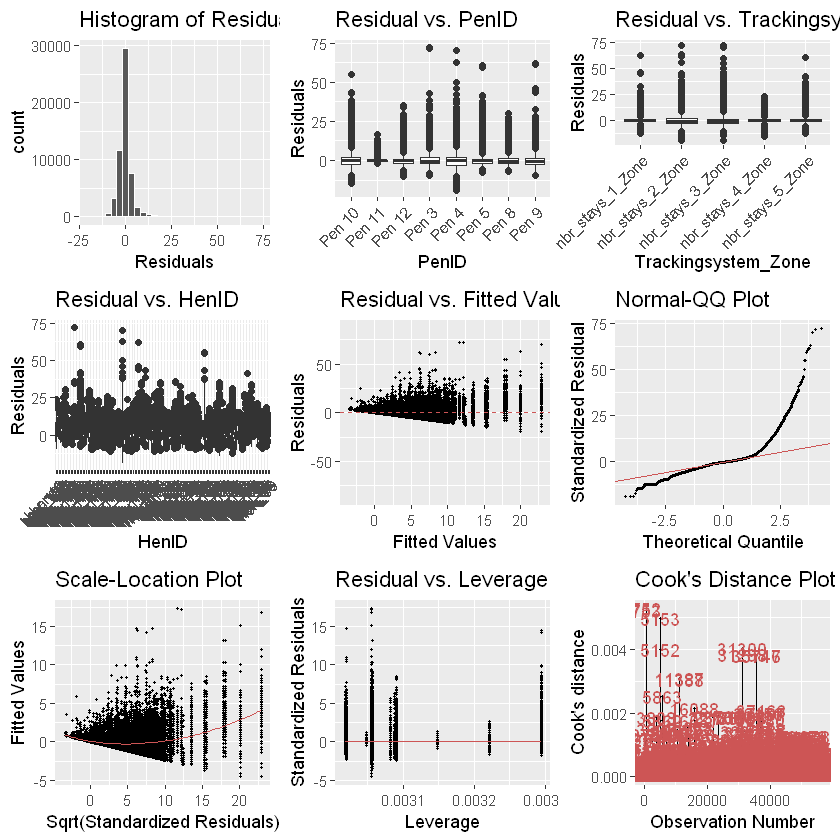

In [32]:
model_test = lm(absolute_difference~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_test)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


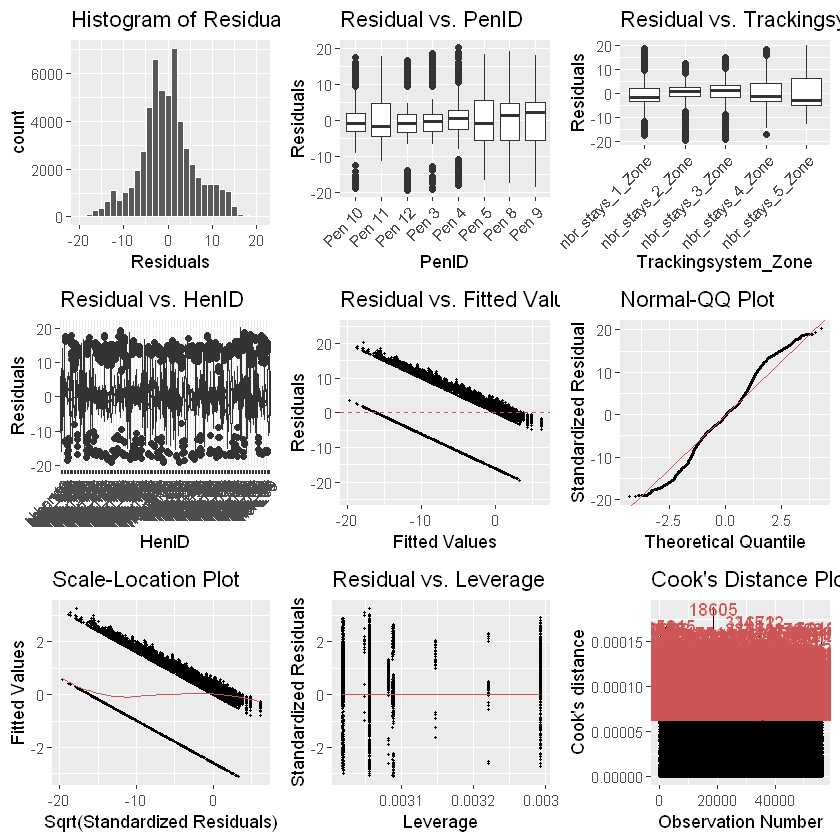

In [31]:
df$absolute_difference_log_0 = log(df$absolute_difference+0.0000001) #add one then take the log
model_test = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_test)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


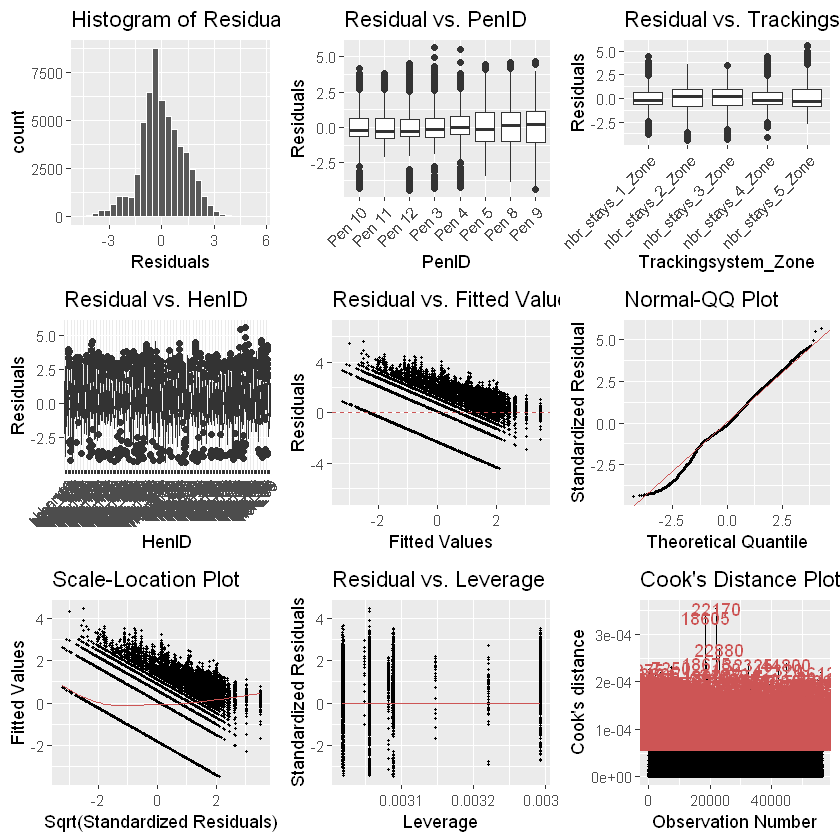

In [28]:
df$absolute_difference_log_0 = log(df$absolute_difference+0.1) #add one then take the log
model_test = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_test)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


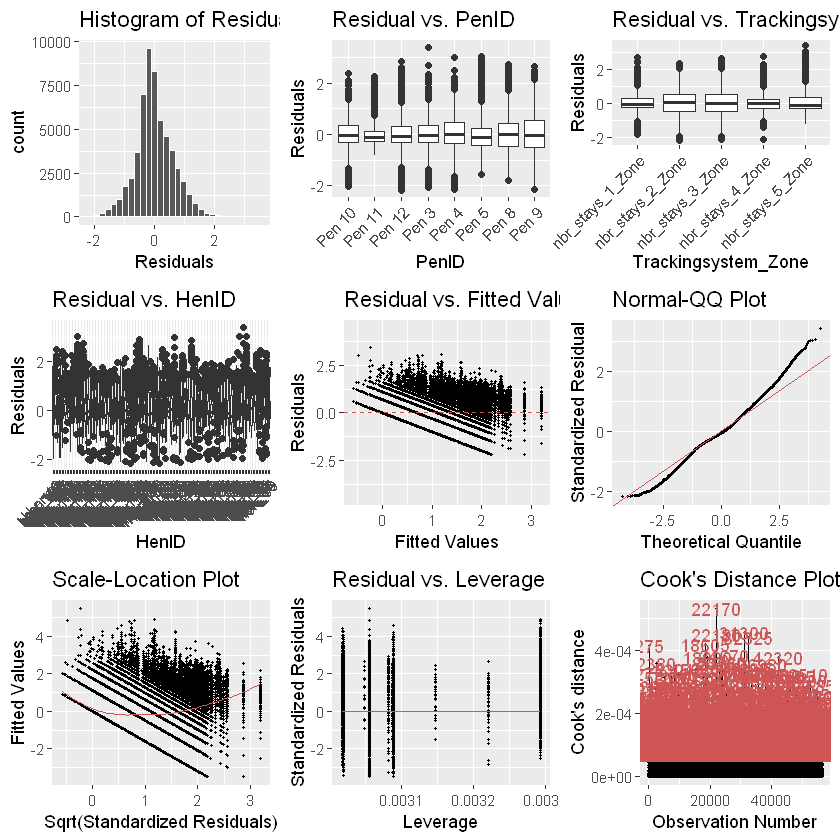

In [29]:
df$absolute_difference_log_0 = log(df$absolute_difference+1) #add one then take the log
model_test = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_test)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


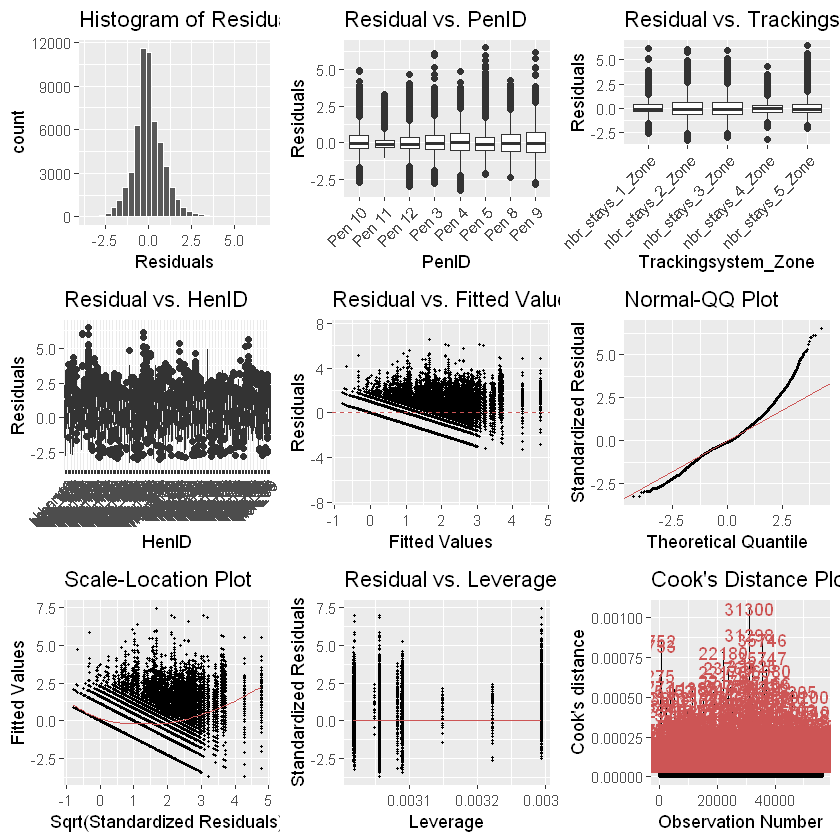

In [30]:
df$absolute_difference_log_0 = sqrt(df$absolute_difference) #add one then take the log
model_test = lm(absolute_difference_log_0~PenID*Trackingsystem_Zone+HenID, data=df)
lindia::gg_diagnose(model_test)